In [1]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [6]:
con = sqlite3.connect('model_preformance.db')

all_res = pd.read_sql('select * from results',con = con)

In [7]:
all_res.head()

,iteration,total_reward,type,action_space_
0,1,-197.015866,100_deep_q_bellman_act_200,7
1,2,-221.732259,100_deep_q_bellman_act_200,7
2,3,-373.149169,100_deep_q_bellman_act_200,7
3,4,-415.580930,100_deep_q_bellman_act_200,7
4,5,-280.875208,100_deep_q_bellman_act_200,7


In [8]:
top = all_res.groupby('type')['total_reward'].mean().reset_index().sort_values('total_reward')
top.tail(5)['type']

11                   100_deep_q_bellman_1.0
7     100_deep_q_bellman_0.6000000000000001
20               100_deep_q_bellman_act_500
10                   100_deep_q_bellman_0.9
3                    100_deep_q_bellman_0.2
Name: type, dtype: object

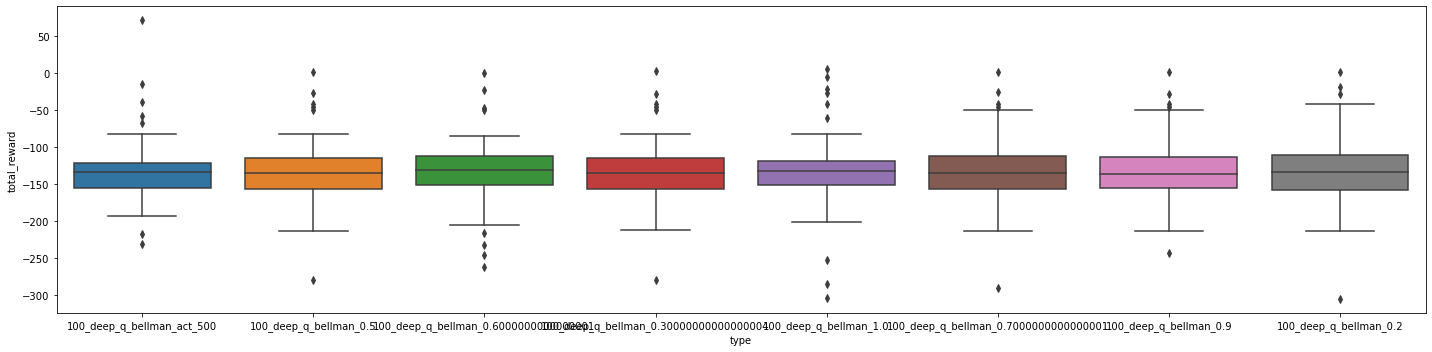

In [9]:
fig=plt.figure(figsize=(20,5))
ax = sns.boxplot(x="type", y="total_reward", data=all_res[all_res['type'].isin(top.tail(8)['type'])])
plt.tight_layout()
plt.show()

In [10]:
all_res.head()

,iteration,total_reward,type,action_space_
0,1,-197.015866,100_deep_q_bellman_act_200,7
1,2,-221.732259,100_deep_q_bellman_act_200,7
2,3,-373.149169,100_deep_q_bellman_act_200,7
3,4,-415.580930,100_deep_q_bellman_act_200,7
4,5,-280.875208,100_deep_q_bellman_act_200,7


In [11]:
all_res['type'].unique()

array(['100_deep_q_bellman_act_200', '100_deep_q_bellman_act_800',
       '100_deep_q_bellman_act_1000', '100_deep_q_bellman_act_700',
       '100_deep_q_bellman_act_500', '100_deep_q_bellman_0.8',
       '100_deep_q_bellman_0.5', '100_deep_q_bellman_0.6000000000000001',
       '100_deep_q_bellman_1.3', '100_deep_q_bellman_0.1',
       '100_deep_q_bellman_1.1', '100_deep_q_bellman_act_900',
       '100_deep_q_bellman_act_300', '100_deep_q_4',
       '100_deep_q_bellman_0.30000000000000004',
       '100_deep_q_bellman_act_600', '100_deep_q_bellman_1.0',
       '100_deep_q', '100_deep_q_bellman_act_400',
       '100_deep_q_bellman_0.7000000000000001', 'basic_deep_q',
       '100_deep_q_bellman_1.2000000000000002', '100_deep_q_bellman_0.4',
       '100_deep_q_bellman_0.9', '100_deep_q_bellman_0.2', 'random',
       '100_deep_q_bellman_act_100', 'policy'], dtype=object)

In [12]:
all_res[all_res['type']=='policy']

,iteration,total_reward,type,action_space_
12800,0,-586.556764,policy,211
12801,0,-569.712963,policy,211
12802,1,-741.815672,policy,211
12803,2,-545.358135,policy,211
12804,3,-666.639283,policy,211
...,...,...,...,...
17037,4236,-506.788084,policy,211
17038,4237,-410.201957,policy,211
17039,4238,-490.383913,policy,211
17040,4239,-598.548095,policy,211


<AxesSubplot:xlabel='iteration', ylabel='total_reward'>

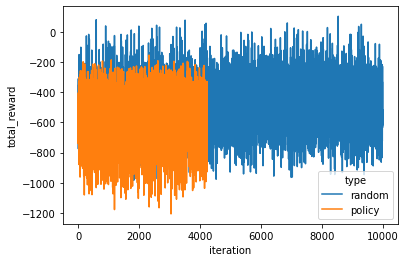

In [15]:
sns.lineplot(data=all_res[all_res['type'].isin(['policy','random'])],x='iteration',y='total_reward',hue='type' )